In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

### Loading the data

In [2]:
# Finding the correct file encoding ('UTF-16')

with open ('cars.csv', 'rb') as f:
    result = chardet.detect(f.read())
cars = pd.read_csv('cars.csv', encoding=result['encoding'])

### Examing the data

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Brand    144867 non-null  object 
 1   Model    144867 non-null  object 
 2   Year     144867 non-null  int64  
 3   Status   144867 non-null  object 
 4   Mileage  55914 non-null   float64
 5   Dealer   144539 non-null  object 
 6   Price    140956 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.7+ MB


In [4]:
print('Column    | NaN Percents')
print('------------------------')
for c in cars.columns:
    total_count = cars[c].shape[0]
    null_count = cars[c].isna().sum()
    null_perc = (null_count/total_count*100).round(1)
    print('{:<13} {:>4} %'.format(c, null_perc))

Column    | NaN Percents
------------------------
Brand          0.0 %
Model          0.0 %
Year           0.0 %
Status         0.0 %
Mileage       61.4 %
Dealer         0.2 %
Price          2.7 %


In [5]:
cars.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [6]:
cars.describe()

,Year,Mileage,Price
count,144867.000000,55914.000000,1.409560e+05
mean,2021.374716,52720.606485,5.267889e+04
std,3.995397,44014.784892,4.221504e+04
min,1959.000000,0.000000,1.000000e+00
25%,2021.000000,20116.000000,3.211000e+04
50%,2023.000000,41417.500000,4.707200e+04
75%,2024.000000,73590.750000,6.531125e+04
max,2024.000000,419096.000000,8.078160e+06


### Cleaning the data

In [7]:
 # Delete columns
cars.drop(columns='Dealer', inplace=True) 

In [8]:
 # Delete rows without price
cars.dropna(subset=['Price'], inplace=True)  
cars.shape

(140956, 6)

### Create new category column - brand origin (American / European / Asian)

In [9]:
American = ['Buick', 'Cadillac','Chevrolet', 'Chrysler', 'Dodge', 'Eagle', 'Ford', 'GMC', 'Geo', 'Hummer',
            'International Scout', 'Jeep', 'Lincoln', 'Lucid', 'Mercury', 'Oldsmobile', 'Plymouth',
            'Pontiac', 'RAM', 'Rivian', 'Saturn', 'Tesla']
European = ['Alfa Romeo','Aston Martin', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'FIAT', 'Ferrari', 'Jaguar',
            'Lamborghini', 'Land Rover', 'Lotus', 'MINI', 'Maserati', 'Maybach', 'McLaren', 'Mercedes',
            'Polestar', 'Porsche', 'Rolls-Royce', 'Saab','Smart', 'Volkswagen', 'Volvo']

In [10]:
cars['Origin'] = np.select([cars['Brand'].isin(American), cars['Brand'].isin(European)], ['American', 'European'], 'Asian')


In [11]:
cars.sort_values('Price', ascending=False)

,Brand,Model,Year,Status,Mileage,Price,Origin
121610,Audi,Q8,2023,New,NaN,8078160.0,European
86879,Bugatti,Chiron,2019,Used,1760.0,3399000.0,European
129461,Jeep,Wagoneer,2022,New,NaN,3383150.0,American
42404,Porsche,911,1994,Used,12830.0,1299995.0,European
104860,Ferrari,Spider,2023,Certified,223.0,849990.0,European
...,...,...,...,...,...,...,...
98761,Chevrolet,HHR,2007,Used,201450.0,1900.0,American
112408,Pontiac,G6,2009,Used,193401.0,1795.0,American
27110,Ford,F-150,2000,Used,217000.0,1699.0,American
125588,Pontiac,Sunfire,2002,Used,153667.0,1500.0,American


### Basic analysis

Comparing cars' prices by Origin and Status:

In [12]:

# add_mean_line function for later use in the graph

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Define axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='red', lw=1, ls='--')
    
    #annotate group mean
    ax.text(0.6, 0.85, f'Mean Price=${m:0,.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='red', fontsize=10)

<Figure size 2000x2000 with 0 Axes>

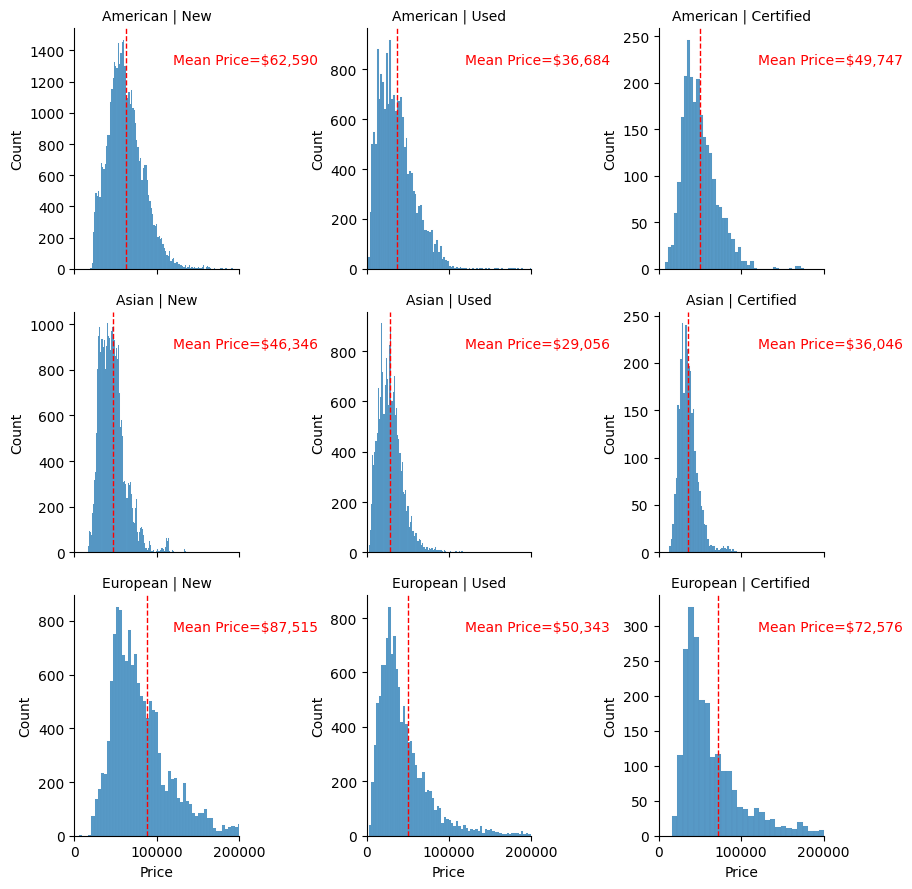

In [113]:
# Cars' prices by status and origin

plt.figure(figsize=(20, 20))
p = sns.FacetGrid(cars, col='Status', row='Origin',
                  row_order=['American', 'Asian', 'European'],
                  sharey=False)
p.map_dataframe(sns.histplot, 'Price')
p.map_dataframe(add_mean_line, var='Price')
p.set(xlim=(0, 200000))
p.set_titles(col_template='{col_name}', row_template='{row_name}')

plt.show();

<Figure size 1500x800 with 0 Axes>

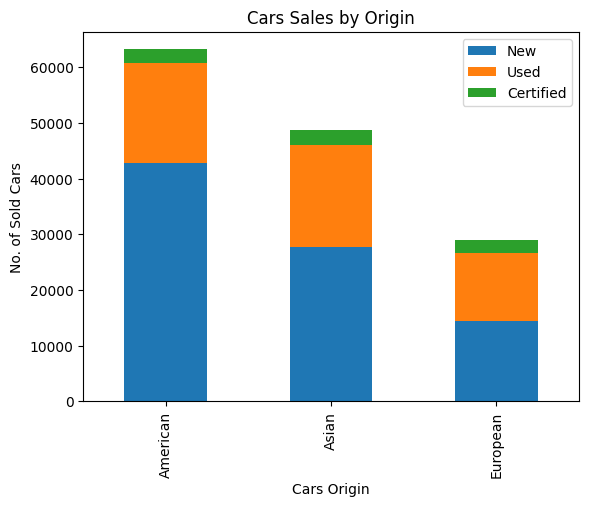

In [117]:

# Brands list amount by status
cars_origin = cars.groupby(['Origin', 'Status'])['Status'].count().unstack().fillna(0)

# Sort the status categories by order: New, Used, Cerified
cars_origin.columns = pd.CategoricalIndex(cars_origin.columns.values, 
                                          categories=['New', 'Used', 'Certified'],
                                          ordered=True)
cars_origin.sort_index(axis=1, inplace=True)

# Sorting the brands by total sales
cars_origin['Total'] = cars_origin.sum(axis=1)
cars_origin = cars_origin.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(15,8))
cars_origin.iloc[:20].plot(kind='bar', stacked=True)
plt.xlabel('Cars Origin')
plt.ylabel('No. of Sold Cars')
plt.title('Cars Sales by Origin')
plt.show()



Top Cars' sales by brand:

<Figure size 1500x800 with 0 Axes>

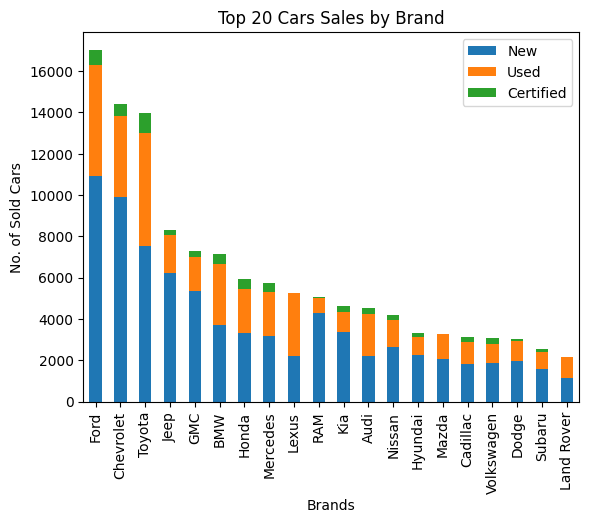

In [ ]:

# Brands list amount by status
cars_brands = cars.groupby(['Brand', 'Status'])['Status'].count().unstack().fillna(0)

# Sort the status categories by order: New, Used, Cerified
cars_brands.columns = pd.CategoricalIndex(cars_brands.columns.values, 
                                          categories=['New', 'Used', 'Certified'],
                                          ordered=True)
cars_brands = cars_brands.sort_index(axis=1)

# Sorting the brands by total sales
cars_brands['Total'] = cars_brands.sum(axis=1)
cars_brands = cars_brands.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(15,8))
cars_brands.iloc[:20].plot(kind='bar', stacked=True)
plt.xlabel('Brands')
plt.ylabel('No. of Sold Cars')
plt.title('Top 20 Cars Sales by Brand')
plt.show()



Top cars' sale by model:

<Figure size 800x1500 with 0 Axes>

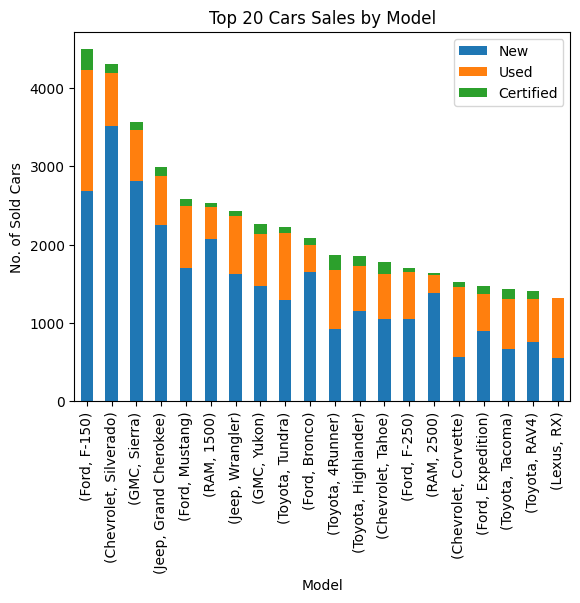

In [15]:

# Brands list amount by status
cars_models = cars.groupby(['Brand', 'Model', 'Status'])['Status'].count().unstack().fillna(0)

# Sort the status categories by order: New, Used, Cerified
cars_models.columns = pd.CategoricalIndex(cars_models.columns.values, 
                                          categories=['New', 'Used', 'Certified'],
                                          ordered=True)
cars_models = cars_models.sort_index(axis=1)

# Sorting the brands by total sales
cars_models['Total'] = cars_models.sum(axis=1)
cars_models = cars_models.sort_values('Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(8,15))
cars_models.iloc[:20].plot(kind='bar', stacked=True)
plt.xlabel('Model')
plt.ylabel('No. of Sold Cars')
plt.title('Top 20 Cars Sales by Model')
plt.show()




Calculate value change per top 200 models (New car's price vs. Used car's price) 

In [16]:
# Count the number of sales per model
model_count = cars.groupby(['Brand', 'Model'])['Status'].count().reset_index()

# Create DF of models that were sold more than 200 (top models)
models_top = model_count[model_count['Status'] >= 200].rename(columns={'Status':'Sales_No.'})

# Create DF of sales only for (top models)
cars_sales_top = cars[cars['Brand'].isin(models_top['Brand'])]

In [102]:
# New DF: New cars' mean price per model 
new_cars = cars_sales_top[cars_sales_top['Status'] == 'New']
cars_price = new_cars.groupby(['Brand', 'Model', 'Origin']).agg({'Price': 'mean'}).reset_index()

# Used cars' mean price per model 
used_cars = cars_sales_top[cars_sales_top['Status'] == 'Used']
cars_price = pd.merge(cars_price, used_cars.groupby(['Brand', 'Model', 'Origin']).agg({'Price': 'mean'}), on=['Brand', 'Model'], how='left')

# Rename columns
cars_price.rename(columns={'Price_x': 'New_Price', 'Price_y': 'Used_Price'}, inplace=True)

# Cleaning: Droping models with NaN values
cars_price.dropna(inplace=True)

# Adding price lost columns (value and percentage)
# Remark: Negative value - Increase in price 
cars_price['Price_Diff'] = cars_price['New_Price']-cars_price['Used_Price']
cars_price['Price_Diff_Precent'] = cars_price['Price_Diff']/cars_price['New_Price']*100



C:\Users\ronen\AppData\Local\Temp\ipykernel_92068\3840588357.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xlabel1, rotation='vertical')
C:\Users\ronen\AppData\Local\Temp\ipykernel_92068\3840588357.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlabel2, rotation='vertical')


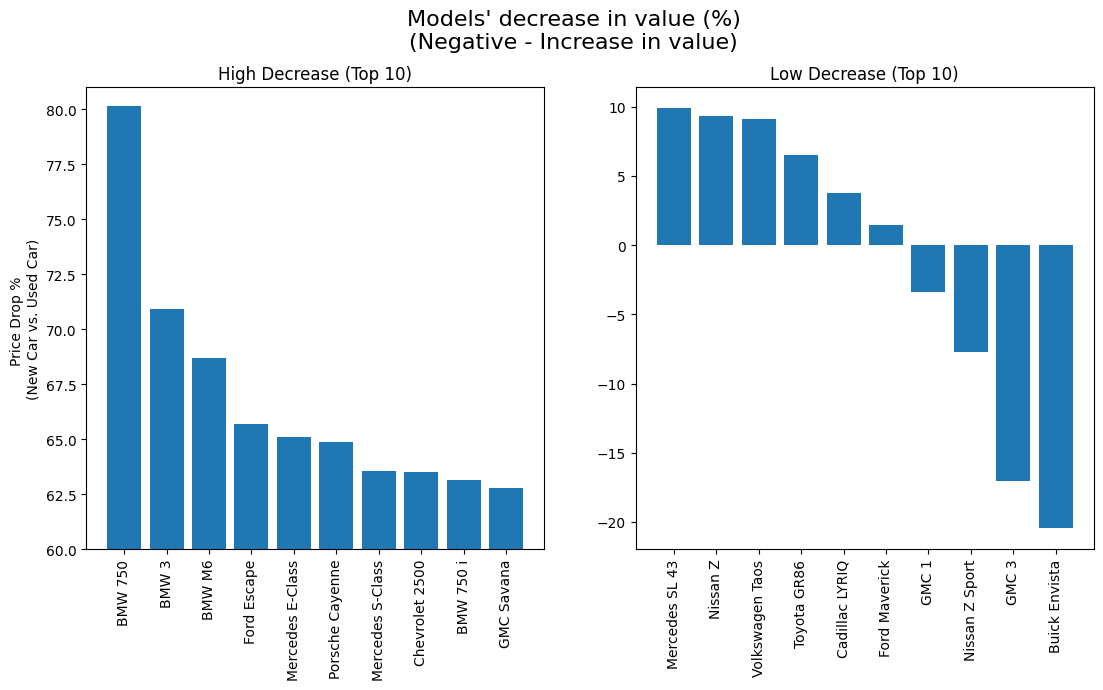

In [100]:
cars_high = cars_price.sort_values('Price_Diff_Precent', ascending=False).head(10)
cars_low = cars_price.sort_values('Price_Diff_Precent', ascending=False).tail(10)

xlabel1 = [b+' '+m for b, m in zip(cars_high['Brand'], cars_high['Model'])]
xlabel2 = [b+' '+m for b, m in zip(cars_low['Brand'], cars_low['Model'])]

fig, (ax1, ax2) = plt.subplots(figsize=(13,6), nrows=1, ncols=2)
ax1.bar(cars_high['Model'], cars_high['Price_Diff_Precent'])
ax1.set_ylim(60, 81)
ax1.set_ylabel('Price Drop % \n(New Car vs. Used Car)')
ax1.set_xticklabels(xlabel1, rotation='vertical')
ax1.set_title('High Decrease (Top 10)')

ax2.bar(cars_low['Model'], cars_low['Price_Diff_Precent'])
ax2.set_xticklabels(xlabel2, rotation='vertical')
ax2.set_title('Low Decrease (Top 10)')

plt.suptitle("Models' decrease in value (%)\n(Negative - Increase in value)", size=16, y=1.01)
plt.show()
